# Importing Libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Loading American AirLines Gropu lnc Stock Value

In [9]:
# path to csv file
df = pd.read_csv("E:/deeplearning/RNNS/Stock Analysis/_content_individual_stocks_5yr_individual_stocks_5yr_AAL_data.csv")

### Printing first five rows of the dataframe

In [10]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


### Knowing the no. of rows and columns in a dataframe

In [11]:
df.shape

(1259, 7)

In [13]:
import datetime
from datetime import datetime 

### Converting date column into datetime datatype 

In [14]:
df['date'] = pd.to_datetime(df['date'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
date      1259 non-null datetime64[ns]
open      1259 non-null float64
high      1259 non-null float64
low       1259 non-null float64
close     1259 non-null float64
volume    1259 non-null int64
Name      1259 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 69.0+ KB


# Splitting the dataframe into train and test data.

#### The stock value of a company from year 2013 to 2018 is taken as training data and the stock value of a company in year 2018 is taken as testing data

In [16]:
train_df = df[df['date'].between('2013-01-01','2018-01-01')]
test_df = df[df['date'].between('2018-01-01','2018-02-08')]

### Printing the number of rows and columns (i.e shapes) of training and testing data

In [17]:
print(train_df.shape)
print(test_df.shape)

(1233, 7)
(26, 7)


## Use Opening Stock as an indicator to RNNS Stock market trend prediction

In [18]:
training_set = train_df.iloc[:,1:2].values

#### The training set consists of 1233 rows and only one column (i.e Opening Stock).

In [19]:
training_set.shape

(1233, 1)

# Feature Scaling
### Normalisation(Subtracting the xmin from x and dividing by xmax-xmin)

In [20]:
from sklearn.preprocessing import MinMaxScaler

## Scaling the values to a range of 0 to1 using minmax scaler.
#### Formula :  x_scaled = (x - xmin)/(xmax - xmin)

In [21]:
sc = MinMaxScaler(feature_range=(0,1))


In [22]:
training_set_scaled = sc.fit_transform(training_set)

## After scaling the training set looks like this:

In [23]:
training_set_scaled

array([[0.0451462 ],
       [0.04093567],
       [0.03064327],
       ...,
       [0.9277193 ],
       [0.91953216],
       [0.91883041]])

## Creating a data structure with 125 timesteps and 1 output
#### Since we are using LSTM (Long Short Term Memory),LSTM is able to remember / memorize the recently occured data and here in our case we are assuming that our LSTM is able to remember / memorize the stock data of 125 days(i.e. time steps) to make a prediction of next day opening stock price.

In [24]:
X_train = []
y_train = []
for i in range(125,1233):
  X_train.append(training_set_scaled[i-125:i,0])
  y_train.append(training_set_scaled[i,0])
  


In [25]:
print(len(X_train))
print(len(y_train))

1108
1108


## Converting a list(i.e 1D array) to numpy array(i.e. ND arrays)

In [29]:
X_train,y_train = np.array(X_train),np.array(y_train)

In [30]:
X_train.shape

(1108, 125)

In [31]:
y_train.shape

(1108,)

In [32]:
print("The no of batches/training examples to the neural network   :  ",X_train.shape[0])
print("The no of time steps for RNN(Recurrent Neural Networks)   :  ",X_train.shape[1])

The no of batches/training examples to the neural network   :   1108
The no of time steps for RNN(Recurrent Neural Networks)   :   125


# Reshaping the training data 
#### We have to reshape the training data as the neural network expects the input data to have 4 dimensions to fit into the network.

In [33]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [34]:
X_train.shape

(1108, 125, 1)

# Part-2: Building the RNN

### Importing Keras Libraries And Packages

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

### Initializing Our RNN

In [40]:
regressor = Sequential()

### Adding the First LSTM Layer and some Dropout Regularization
##### We are using dropout regularization so that our neural network doesnot overfit much to the training data.


In [41]:
regressor.add(LSTM(units=100, return_sequences = True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.25))

### Adding the Second LSTM Layer and some Dropout Regularization

In [42]:
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.25))

### Adding the Third LSTM Layer and some Dropout Regularization

In [43]:
regressor.add(LSTM(units=125,return_sequences=True))
regressor.add(Dropout(0.25))

### Adding the Fourth LSTM Layer and some Dropout Regularization

In [44]:
regressor.add(LSTM(units=125,return_sequences=False))
regressor.add(Dropout(0.25))

### Adding the output Dense Layer

In [45]:
regressor.add(Dense(units=1))

## Compiling the model

In [46]:
 regressor.compile(optimizer='adam',loss='mean_squared_error')

### Fitting the RNN to the Training Set

In [47]:
history = regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
1108/1108 [==============================] - 24s 22ms/sample - loss: 0.0522
Epoch 2/100
1108/1108 [==============================] - 22s 20ms/sample - loss: 0.0093
Epoch 3/100
1108/1108 [==============================] - 22s 20ms/sample - loss: 0.0076
Epoch 4/100
1108/1108 [==============================] - 25s 22ms/sample - loss: 0.0065
Epoch 5/100
1108/1108 [==============================] - 24s 22ms/sample - loss: 0.0075
Epoch 6/100
1108/1108 [==============================] - 24s 21ms/sample - loss: 0.0073
Epoch 7/100
1108/1108 [==============================] - 25s 22ms/sample - loss: 0.0060
Epoch 8/100
1108/1108 [==============================] - 22s 20ms/sample - loss: 0.0057
Epoch 9/100
1108/1108 [==============================] - 25s 23ms/sample - loss: 0.0055
Epoch 10/100
1108/1108 [==============================] - 23s 20ms/sample - loss: 0.0055
Epoch 11/100
1108/1108 [==============================] - 23s 21ms/sample - loss: 0.0054
Epoch 12/100
1108/1108 [======

1108/1108 [==============================] - 22s 19ms/sample - loss: 0.0016
Epoch 94/100
1108/1108 [==============================] - 22s 20ms/sample - loss: 0.0015
Epoch 95/100
1108/1108 [==============================] - 21s 19ms/sample - loss: 0.0016
Epoch 96/100
1108/1108 [==============================] - 22s 19ms/sample - loss: 0.0017
Epoch 97/100
1108/1108 [==============================] - 21s 19ms/sample - loss: 0.0015
Epoch 98/100
1108/1108 [==============================] - 21s 19ms/sample - loss: 0.0016
Epoch 99/100
1108/1108 [==============================] - 21s 19ms/sample - loss: 0.0017
Epoch 100/100
1108/1108 [==============================] - 22s 19ms/sample - loss: 0.0015


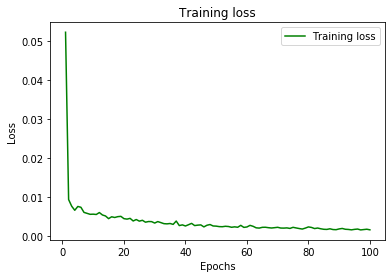

In [49]:
loss_train = history.history['loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Serializing the model
#### To save our trained model, we have to serialize the model architecture and model pretrained weights. So, serializing our model architecture in json file and model weights in h5 file format.

In [51]:
# serialize model to JSON
regressor_model_json = regressor.to_json()
with open("regressor_model.json", "w") as json_file:
    json_file.write(regressor_model_json)
# serialize weights to HDF5
regressor.save_weights("model.h5")
print("Saved model to disk")
 

Saved model to disk


## Making the Predictions and visualising the results

### Getting the real stock price of 2018


In [52]:
real_stock_price = test_df.iloc[:,1:2].values

### Checking the number of rows and columns(shape) of real stock price

In [53]:
real_stock_price.shape

(26, 1)

### Merging the whole dataset by concatenating
#####  The axis = 0 means that the row values of the dataframes are concatenated . The axis =1 is used if we want to concatenate the columns of two dataframes

In [54]:
dataset_total = pd.concat((train_df['open'],test_df['open']),axis=0)

In [55]:
dataset_total.shape

(1259,)

### Preparing the testing data

In [56]:
inputs = dataset_total[len(dataset_total)-len(test_df)-125:].values

In [57]:
inputs.shape

(151,)

###  Reshaping the testing data for evaluating the model.

In [58]:
inputs = inputs.reshape(-1,1)

In [59]:
inputs.shape

(151, 1)

### Scaling the inputs

In [60]:
inputs = sc.transform(inputs)

### Appending the testing data values in a list

In [61]:
X_test = []
for i in range(125,151):
  X_test.append(inputs[i-125:i,0])
X_test = np.array(X_test)


### Reshaping the test data for making prediction

In [62]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [63]:
X_test.shape

(26, 125, 1)

### Predict the stock price

In [65]:
predicted_stock_price = regressor.predict(X_test)

### Transforming the scaled value to original value using inverse_transform function

In [66]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results

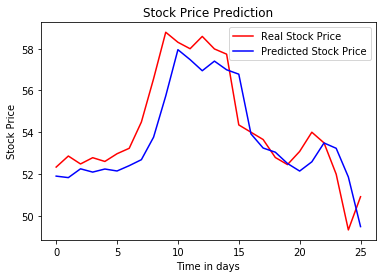

In [67]:
import matplotlib.pyplot as plt
plt.plot(real_stock_price,color='red',label='Real Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Stock Price')
plt.title("Stock Price Prediction")
plt.xlabel('Time in days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Note: For more accuracy you have to experiment by:
### 1)adding more lstm layers   2) adding more units in each layer 3) Taking more time steps than 125